<a href="https://colab.research.google.com/github/m-aliabbas/EvolutionaryComputing/blob/master/ResnetFeatureLastLayer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import fastai
from fastai.vision import *
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
from zipfile import ZipFile 
def unZip(file_name):
  with ZipFile(file_name, 'r') as zip: 
      zip.extractall() 
      print('Done!') 

In [0]:
file_name = '/content/drive/chestXRay.zip'

In [0]:
path="/content/drive/My Drive/"
file_name=path+'chestXRay.zip'

In [7]:
unZip(file_name)

Done!


In [8]:
!ls chest_xray

ls: cannot access 'chest_xray': No such file or directory


In [9]:
!ls

chest_xray.zip	drive  sample_data


In [10]:
unZip('chest_xray.zip')

Done!


In [11]:
!ls chest_xray

test  train  val


In [0]:
import glob
import cv2
import numpy as np
%matplotlib inline
filesPos= sorted(glob.glob('chest_xray/train/NORMAL/*.jpeg'))
filesNeg=sorted(glob.glob('chest_xray/train/PNEUMONIA/*.jpeg'))

In [13]:
print(len(filesPos),len(filesNeg))

1341 3875


In [0]:
from fastai import *
import shutil
def copyfiles(filesName,dest):
  c=0
  for file in filesName:
    shutil.copy(file, dest)
    c+=1
  print("Copied "+str(c))

In [0]:
!mkdir dataset1

In [0]:
!mkdir dataset1/train

In [17]:
!ls dataset1

train


In [0]:
!mkdir dataset1/train/PNEUMONIA

In [19]:
!ls dataset1/train/

PNEUMONIA


In [0]:
filesNeg=filesNeg[:1340]

In [0]:
import random 
random.seed(3000)
random.shuffle(filesNeg)

In [22]:
!ls chest_xray

test  train  val


In [23]:
copyfiles(filesPos,'dataset1/train/NORMAL')

Copied 1341


In [24]:
copyfiles(filesNeg,'dataset1/train/PNEUMONIA')

Copied 1340


In [0]:
!mkdir dataset1/valid

In [0]:
!mkdir dataset1/test

In [0]:
!cp -r chest_xray/val dataset1/

In [0]:
!cp -r chest_xray/test dataset1/

In [0]:
!rm -rf dataset1/valid

In [0]:
!mv dataset1/val dataset1/valid

In [0]:
np.random.seed(1234)
path='dataset1'
data = ImageDataBunch.from_folder(path,
        ds_tfms=get_transforms(do_flip=True,max_lighting=0.1),
        seed=1234,
        valid_pct=0.2,                          
        size=224,
        num_workers=8,
        bs=32,
        test="test")

In [33]:
data.classes

['NORMAL', 'PNEUMONIA']

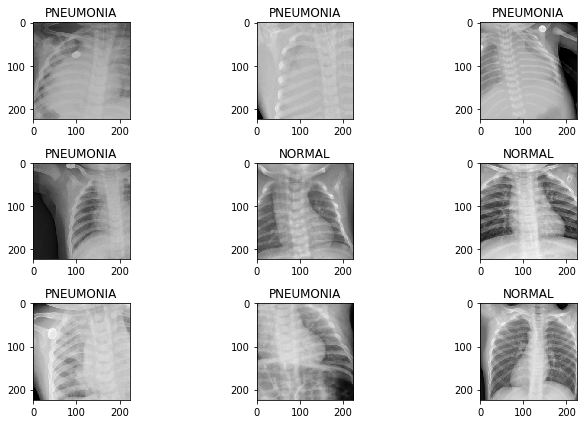

In [34]:
data.show_batch(rows=3, figsize=(10,6), hide_axis=False)

In [35]:
data

ImageDataBunch;

Train: LabelList (1584 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: dataset1;

Valid: LabelList (396 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,NORMAL,PNEUMONIA,PNEUMONIA
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1

In [36]:

import torch 
import torchvision
resnet18PT = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:01<00:00, 23627985.06it/s]


In [0]:
num_ftrs = resnet18PT.fc.in_features
resnet18PT.fc=nn.Sequential(
    
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, 128),
    nn.Dropout(0.5),
    nn.Linear(128, 2),
)

In [0]:
resnet18PT=resnet18PT.cuda()

In [0]:


learn = Learner(data, resnet18PT, metrics=[error_rate, accuracy,])

In [42]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (1584 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: dataset1;

Valid: LabelList (396 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,NORMAL,PNEUMONIA,PNEUMONIA
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1, model=ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicB

In [0]:
learn.freeze_to(40)

In [46]:
learn.fit_one_cycle(15,0.0003)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.849905,0.790266,0.727273,0.272727,01:14
1,0.800507,0.741568,0.603535,0.396465,01:14
2,0.805128,0.689074,0.457071,0.542929,01:13
3,0.770859,0.638994,0.290404,0.709596,01:14
4,0.723062,0.600314,0.219697,0.780303,01:14
5,0.685282,0.551647,0.159091,0.840909,01:15
6,0.638819,0.515984,0.146465,0.853535,01:15
7,0.612613,0.487038,0.118687,0.881313,01:14
8,0.585142,0.469293,0.118687,0.881313,01:16
9,0.550655,0.459295,0.118687,0.881313,01:15


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


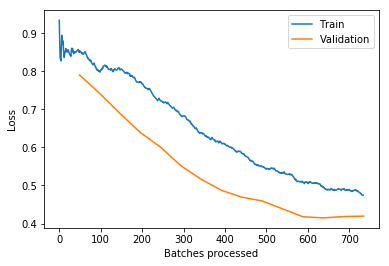

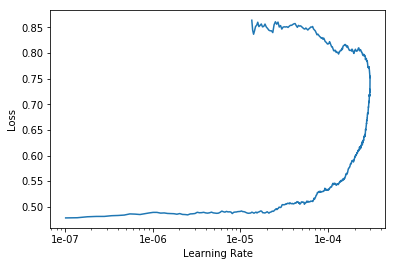

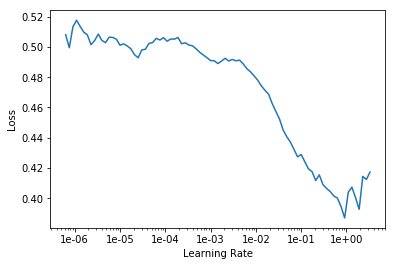

In [47]:
learn.recorder.plot_losses()
learn.recorder.plot(show_momentum=True)
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save('resnet18LastLayer')

In [49]:
learn.load('resnet18LastLayer')

Learner(data=ImageDataBunch;

Train: LabelList (1584 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: dataset1;

Valid: LabelList (396 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,NORMAL,PNEUMONIA,PNEUMONIA
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1, model=ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicB

In [50]:
learn.fit_one_cycle(10,1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.328882,0.312338,0.101010,0.898990,01:13
1,0.336366,0.220220,0.101010,0.898990,01:14
2,0.329130,0.408342,0.101010,0.898990,01:13
3,0.321302,0.801862,0.833333,0.166667,01:13
4,0.310246,0.223525,0.101010,0.898990,01:13
5,0.289350,0.565853,0.101010,0.898990,01:13
6,0.274151,0.199706,0.101010,0.898990,01:13
7,0.251337,0.597328,0.393939,0.606061,01:13
8,0.238546,0.146778,0.070707,0.929293,01:13
9,0.227918,0.151157,0.032828,0.967172,01:13


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

NameError: ignored

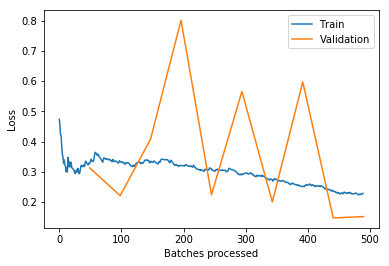

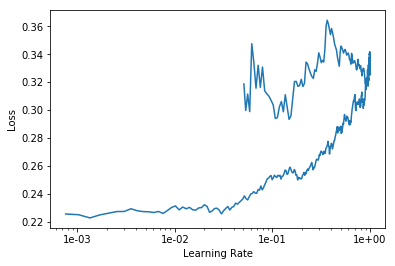

In [51]:
learn.recorder.plot_losses()
learn.recorder.plot()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


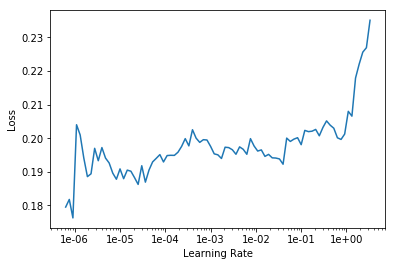

In [52]:
learn.lr_find()
learn.recorder.plot()

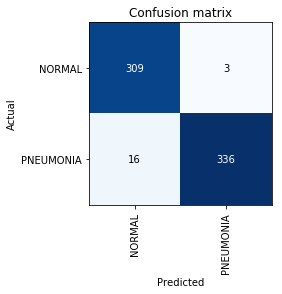

In [0]:
interp.plot_confusion_matrix()

In [56]:
learn.fit_one_cycle(12,max_lr=1e-06)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.233823,0.147678,0.032828,0.967172,01:13
1,0.214446,0.152738,0.035354,0.964646,01:13
2,0.210653,0.149055,0.032828,0.967172,01:13
3,0.209811,0.159070,0.042929,0.957071,01:13
4,0.210891,0.149154,0.035354,0.964646,01:13
5,0.212693,0.148818,0.032828,0.967172,01:13
6,0.208180,0.155404,0.037879,0.962121,01:13
7,0.206787,0.147762,0.032828,0.967172,01:12
8,0.213580,0.146233,0.032828,0.967172,01:13
9,0.210797,0.148258,0.032828,0.967172,01:13


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


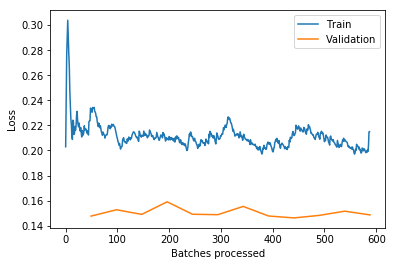

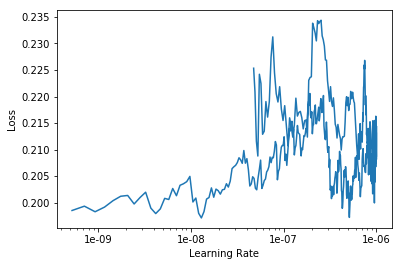

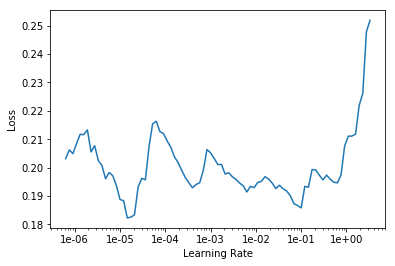

In [58]:
learn.recorder.plot_losses()
learn.recorder.plot()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save('Resnet18LastLayer')

In [62]:
learn.load('Resnet18LastLayer')

Learner(data=ImageDataBunch;

Train: LabelList (1584 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: dataset1;

Valid: LabelList (396 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,NORMAL,PNEUMONIA,PNEUMONIA
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1, model=ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicB

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06
Min loss divided by 10: 7.59E-08


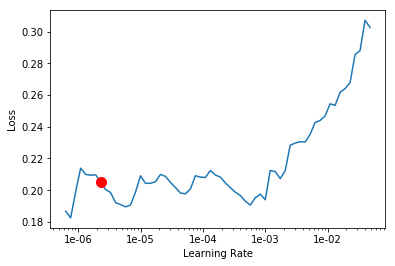

In [64]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
from fastai.callbacks import *
learn = Learner(data, resnet18PT, metrics=[accuracy, error_rate],
                callback_fns=[partial(CSVLogger, append=True)])

In [65]:
from fastai.callbacks import *
learn.fit_one_cycle(15,2.29E-06,callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.208862,0.152027,0.032828,0.967172,01:16
1,0.202462,0.147113,0.032828,0.967172,01:16
2,0.203104,0.151307,0.032828,0.967172,01:15
3,0.209416,0.146334,0.032828,0.967172,01:15
4,0.209282,0.146509,0.030303,0.969697,01:15
5,0.205604,0.147450,0.030303,0.969697,01:14
6,0.209253,0.151310,0.035354,0.964646,01:14
7,0.204029,0.146780,0.037879,0.962121,01:15
8,0.198710,0.145482,0.032828,0.967172,01:14
9,0.201391,0.141781,0.030303,0.969697,01:14


Better model found at epoch 0 with accuracy value: 0.9671717286109924.
Better model found at epoch 4 with accuracy value: 0.9696969985961914.


Precision of Model = 0.9887640449438202 Recall of Model  0.9777777777777777
F1 Score of Model = 0.9832402234636872


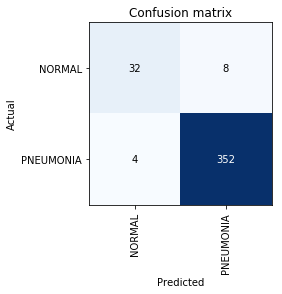

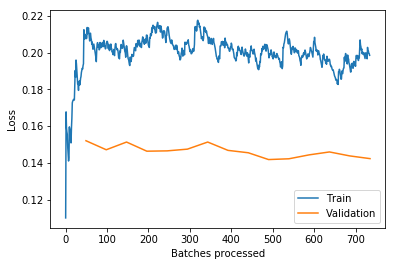

In [66]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
learn.recorder.plot_losses()
learn.save('Resnet18PTFTLastLFinal')
conf=interp.confusion_matrix()
TrueNagitive=conf[0][0]
FalseNegative=conf[0][1]
TruePositive=conf[1][1]
FalsePositive=conf[1][0]
recal=TruePositive/(TruePositive+FalseNegative)
precision=TruePositive/(TruePositive+FalsePositive)
print("Precision of Model =",precision,"Recall of Model ", recal)
f1=2*((precision*recal)/(precision+recal))
print('F1 Score of Model =',f1)

In [67]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (1584 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: dataset1;

Valid: LabelList (396 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,NORMAL,PNEUMONIA,PNEUMONIA
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1, model=ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicB